### The Normal Equation
To find the value of θ that minimizes the cost function, there is a closed-form solution — in other words,
a mathematical equation that gives the result directly. 
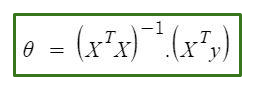

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
m = 100 # number of instances

In [4]:
X = 2 * np.random.rand(m,1) # column-vector
y = 4 + 3*X + np.random.rand(m,1) # column-vector

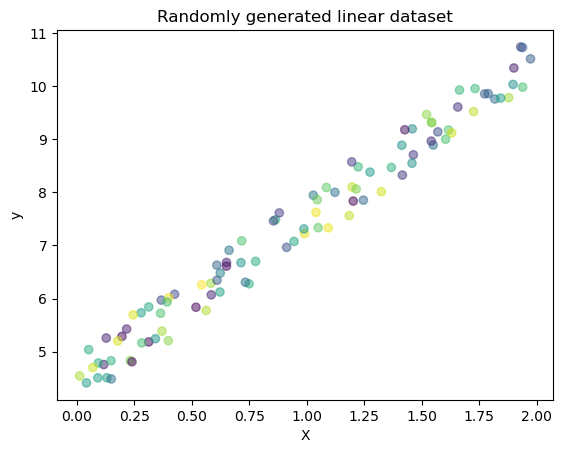

In [5]:
# let's take closer look at randomly generated linear dataset
import matplotlib.pyplot as plt

colors = np.random.rand(m)

plt.scatter(X, y, c=colors, cmap='viridis', alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Randomly generated linear dataset')
plt.show()

Now let’s compute theta-hat using the Normal Equation. We will use the inv() function from NumPy’s Linear
Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix
multiplication:

In [6]:
from sklearn.preprocessing import add_dummy_feature

In [7]:
X_b = add_dummy_feature(X) # add X0=1 to each instances
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # '@' operators means matrix multiplication
theta_best

array([[4.51359766],
       [2.98323418]])

We can now make prediction using theta-hat (theta_best)

In [8]:
X_new = np.array([[0],[1]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

array([[4.51359766],
       [7.49683183]])

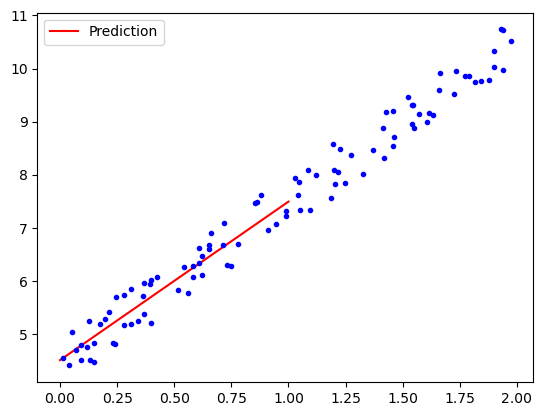

In [9]:
# Let's plot the model predictions
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.plot(X,y, "b.")
plt.legend()
plt.show()

#### Let's look at an another example

In [10]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=10, random_state=42)

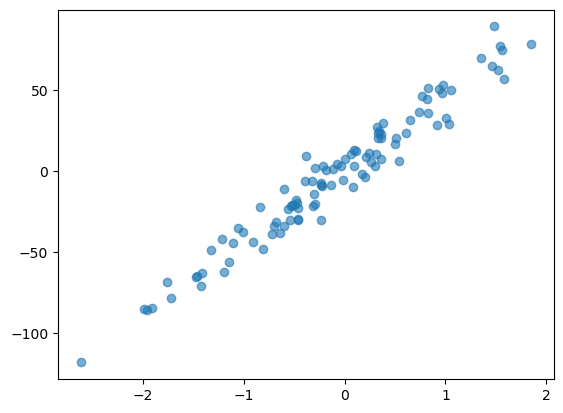

In [11]:
plt.scatter(X, y, cmap='virdis', alpha=0.6)
plt.show()

In [12]:
X_b = add_dummy_feature(X)

In [13]:
def find_theta_best(X_b,y):
    theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return theta_best

In [14]:
find_theta_best(X_b,y)

array([ 1.16511532, 44.43716999])

In [15]:
def my_lin_reg(X_new):
    X_new_b = add_dummy_feature(X_new)
    predictions = X_new_b * theta_best
    return predictions

In [16]:
X_new = np.array([[0.5],[1]])
my_lin_reg(X_new)

array([[4.51359766, 2.25679883],
       [2.98323418, 2.98323418]])

##### However, with a large dataset, Normal Equation may not be able to give us the best parameter of the model. 